In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the Dataset

df = pd.read_csv("http://bit.ly/w-data")
print("****Data read successfully****")
df.head()

****Data read successfully****


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


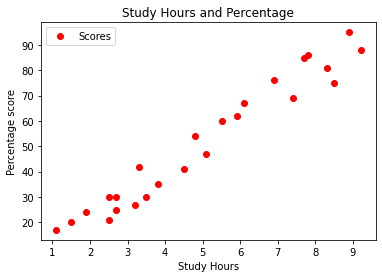

In [3]:
# plot a linear graph between hours and score

df.plot(x = "Hours", y = "Scores", style = "o", color = "Red")
plt.title("Study Hours and Percentage")
plt.xlabel("Study Hours")
plt.ylabel("Percentage score")

plt.show()

In [4]:
# getting values from dataset

X = df.iloc[:, :-1].values
y = df["Scores"]

In [5]:
#making training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.2, random_state = 0)

In [6]:
# training part

from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
Reg.fit(np.array(X_train).reshape(-1, 1), y_train)
Reg.fit(X_train, y_train)
print("**** Training completed ****")

**** Training completed ****


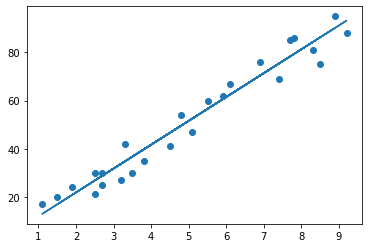

In [7]:
# Regression line plotting

line = Reg.coef_*X+Reg.intercept_
#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [27]:
#making prediction using regreesion

print(X_test)
y_pred = Reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
#compare previous data with predicted data

Df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
Df


,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [24]:
# checking the model for required query

hour = 9.25
hours = np.array(hour).reshape(1,-1)
req_qry = Reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(req_qry[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


In [25]:
# Checking accuracy using r square test

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy of the given model is :",score)


Accuracy of the given model is : 0.9454906892105355


In [23]:
# calculating the error

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
